In [125]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pydotplus 
from IPython.display import Image 
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from id3 import Id3Estimator
from id3 import export_graphviz

# 1st Question

In [126]:
nms=['id','Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',   'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','status']
ctest=pd.read_csv('CancerTest.txt',names=nms)
ctrain=pd.read_csv('CancerTrain.txt',names=nms)

In [127]:
ctrain.head(2)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,status
0,1017122,8,10,10,8,7,10,9,7,1,malignant
1,1018561,2,1,2,1,2,1,3,1,1,benign


In [128]:
ctest.head(2)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,status
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign


In [129]:
X_train= ctrain.iloc[:,:10]
Y_train= ctrain.status
X_test= ctest.iloc[:,:10]
Y_test= ctest.status

In [130]:
X_train.head(2)

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1017122,8,10,10,8,7,10,9,7,1
1,1018561,2,1,2,1,2,1,3,1,1


# CART 

## Gini

In [163]:
acc=[]
for i in range(2,10):
    clf = DecisionTreeClassifier(criterion = "gini", max_depth=i)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    a=accuracy_score(Y_test,y_pred)*100
    acc.append(a)
    print("Accuracy of CART DTree + gini with max depth of %d is %f" %(i, a))

Accuracy of CART DTree + gini with max depth of 2 is 92.731830
Accuracy of CART DTree + gini with max depth of 3 is 93.483709
Accuracy of CART DTree + gini with max depth of 4 is 93.483709
Accuracy of CART DTree + gini with max depth of 5 is 92.982456
Accuracy of CART DTree + gini with max depth of 6 is 93.483709
Accuracy of CART DTree + gini with max depth of 7 is 92.982456
Accuracy of CART DTree + gini with max depth of 8 is 93.984962
Accuracy of CART DTree + gini with max depth of 9 is 94.486216


In [131]:
# Will help in feature
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [133]:
print('Max Accuracy:',max(acc))
print('Average Accuracy:',mean(acc))

('Max Accuracy:', 94.987468671679196)
('Average Accuracy:', 93.765664160401)


## CART DecisionTree Graph

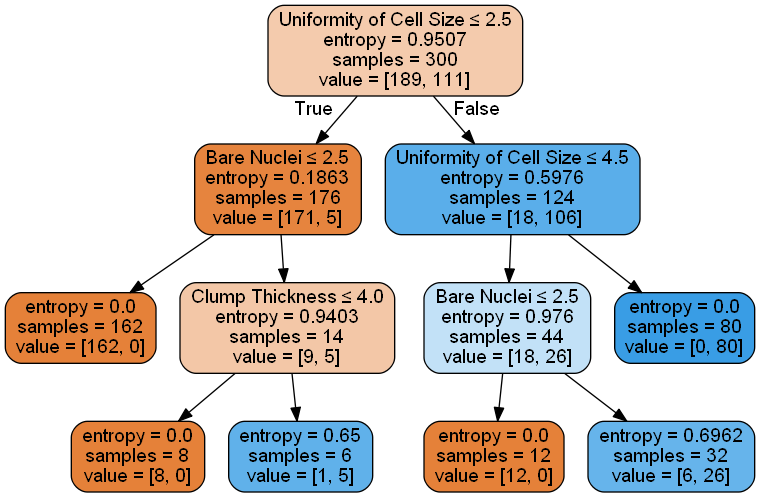

In [134]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=acc.index(max(acc)))
clf.fit(X_train, Y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=nms,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Entropy

In [164]:
acc=[]
for i in range(2,10):
    clf = DecisionTreeClassifier(criterion = "entropy", max_depth=i)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    a=accuracy_score(Y_test,y_pred)*100
    acc.append(a)
    print("Accuracy of CART DTree + entropy with max depth of %d is %f" %(i, a))

Accuracy of CART DTree + entropy with max depth of 2 is 92.481203
Accuracy of CART DTree + entropy with max depth of 3 is 94.736842
Accuracy of CART DTree + entropy with max depth of 4 is 94.736842
Accuracy of CART DTree + entropy with max depth of 5 is 94.736842
Accuracy of CART DTree + entropy with max depth of 6 is 94.736842
Accuracy of CART DTree + entropy with max depth of 7 is 94.987469
Accuracy of CART DTree + entropy with max depth of 8 is 94.486216
Accuracy of CART DTree + entropy with max depth of 9 is 94.736842


In [136]:
print('Max Accuracy:',max(acc))
print('Average Accuracy:',mean(acc))

('Max Accuracy:', 94.987468671679196)
('Average Accuracy:', 94.48621553884709)


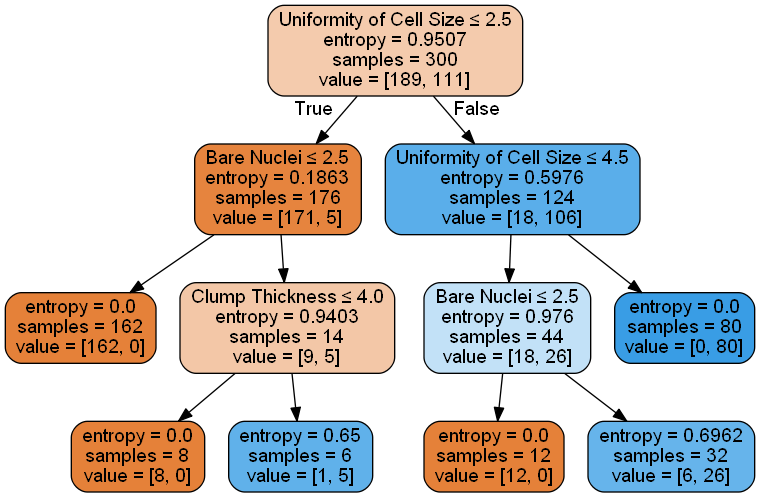

In [137]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=acc.index(max(acc)))
clf.fit(X_train, Y_train)
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=nms,  filled=True, rounded=True,  special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# ID3

In [162]:
acc=[]
for i in range(2,10):
    estimator = Id3Estimator(max_depth=i)
    estimator.fit(X_train, Y_train)
    y_pred = estimator.predict(X_test)
    a=accuracy_score(Y_test,y_pred)*100
    acc.append(a)
    print("Accuracy of ID3 DTree with max depth of %d is %f" %(i, a))

Accuracy of ID3 DTree with max depth of 2 is 92.481203
Accuracy of ID3 DTree with max depth of 3 is 93.734336
Accuracy of ID3 DTree with max depth of 4 is 93.734336
Accuracy of ID3 DTree with max depth of 5 is 94.987469
Accuracy of ID3 DTree with max depth of 6 is 93.483709
Accuracy of ID3 DTree with max depth of 7 is 94.235589
Accuracy of ID3 DTree with max depth of 8 is 94.235589
Accuracy of ID3 DTree with max depth of 9 is 94.235589


In [139]:
print('Max Accuracy:',max(acc))
print('Average Accuracy:',mean(acc))

('Max Accuracy:', 94.987468671679196)
('Average Accuracy:', 93.89097744360902)


In [140]:
# Graph of the Best one with Max accuracy
estimator = Id3Estimator(max_depth=acc.index(max(acc)))
estimator.fit(X_train, Y_train)
export_graphviz(estimator.tree_, 'id3.dot', nms)

<closed file 'id3.dot', mode 'wb' at 0x000000000CF14DB0>

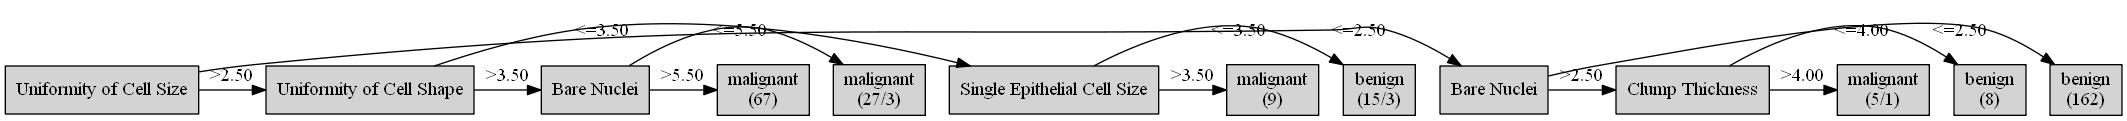

In [141]:
graph = pydotplus.graph_from_dot_file('id3.dot')  
Image(graph.create_png())  

## Max accuracy in all of the algorithms are slightly the same. (About 94.98%)
### CART Entropy Average accuracy : 94.4%
### CART Gini Average accuracy : 93.57%
### ID3 average accuracy : 93.89%.

# 2nd Question

In [239]:
topics=pd.read_csv('topics.data', sep ="\n", encoding='utf-8', header=None)

In [315]:
def readFile(fileName):
    info = [];data = []
    f = open(fileName,'r').read().split("\n\n\n\n\n")
    for index in f: 
        for news in index.split("\n\n\n") :info.append(news)
    for index in info :data.append(index.split("\n\n"))
    df=pd.DataFrame(data)
    del df[4]
    df.columns=["Topic","Subject","Time","Text"]
    return df

In [316]:
df = readFile('training.data')
df.head()

,Topic,Subject,Time,Text
0,cocoa,BAHIA COCOA REVIEW,"SALVADOR, Feb 26 -",Showers continued throughout the week in the B...
1,earn,CHAMPION PRODUCTS &lt;CH&gt; APPROVES STOCK SPLIT,"ROCHESTER, N.Y., Feb 26 -",Champion Products Inc said its board of direct...
2,acq,COMPUTER TERMINAL SYSTEMS &lt;CPML&gt; COMPLET...,"COMMACK, N.Y., Feb 26 -",Computer Terminal Systems Inc said it has comp...
3,earn,COBANCO INC &lt;CBCO&gt; YEAR NET,"SANTA CRUZ, Calif., Feb 26 -","Shr 34 cts vs 1.19 dlrs Net 807,000 vs 2,858,0..."
4,earn,AM INTERNATIONAL INC &lt;AM&gt; 2ND QTR JAN 31,"CHICAGO, Feb 26 -",Oper shr loss two cts vs profit seven cts Oper...


In [317]:
dftest = readFile('test.data')
dftest.head(2)

,Topic,Subject,Time,Text
0,trade,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT,"HONG KONG, April 8 -",Mounting trade friction between the U.S. And J...
1,grain,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS,"PEKING, April 8 -",A survey of 19 provinces and seven cities show...


In [318]:
df.fillna(value="n\a", inplace=True)
dftest.fillna(value="n\a", inplace=True)

In [319]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import neighbors

In [322]:
for i in [1,3,5]:
    hamming = Pipeline([('vect', CountVectorizer(binary=True))
                        ,('clf', neighbors.KNeighborsClassifier(n_neighbors = i))])
    hamming.fit(df.Text, df.Topic)
    ypred = hamming.predict(dftest.Text)
    print('Hamming model score with %d neigbors = %f' %(i,accuracy_score(ypred,dftest)*100))

Hamming model score with 1 neigbors = 62.2472783826
Hamming model score with 3 neigbors = 58.5147744946
Hamming model score with 5 neigbors = 62.2083981337


In [323]:
for i in [1,3,5]:
    e = Pipeline([('vect', CountVectorizer())
                  ,('clf', neighbors.KNeighborsClassifier(n_neighbors = i, weights='distance', metric='euclidean'))])
    e.fit(df.Text,df.Topic)
    ypred = e.predict(dftest.Text)
    print('Euclidean model score with %d neigbors = %f' %(i,accuracy_score(ytest,ypred)*100))

Euclidean model score with 1 neigbors = 72.0839813375
Euclidean model score with 3 neigbors = 70.3732503888
Euclidean model score with 5 neigbors = 72.7449455677


In [325]:
for i in [1,3,5]:
    t = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),
                        ('clf', neighbors.KNeighborsClassifier(n_neighbors = i))])
    t.fit(df.Text,df.Topic)
    ypred = e.predict(dftest.Text)
    print('TF model score with %d neigbors = %f' %(i,accuracy_score(ytest,ypred)*100))

TF model score with 1 neigbors =  72.0839813375
TF model score with 3 neigbors =  70.3732503888
TF model score with 5 neigbors =  72.7449455677
